In [8]:
! pip install japanize-matplotlib

     ---------------------------------------- 4.1/4.1 MB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=94fa32fae0b71b3a97c0231cfeb65e9344ac442c986e87ed80e058d0968bd465
  Stored in directory: c:\users\hiroki masui\appdata\local\pip\cache\wheels\91\8f\c2\83055ad0c9591b0a094730aa7cb2cc12fedacbcd2241baf534
Successfully built japanize-matplotlib


In [1]:
import MeCab

In [2]:
mecab = MeCab.Tagger()

In [6]:
def read_mecab(file):
    results = []
    morphs = []
    with open(file, 'r', encoding='utf-8') as f:
        for row in f:
            if row == 'EOS\n':
                if len(morphs):
                    results.append(morphs)
                    morphs = []
            else:
                cols1 = row.split('\t')
                cols2 = cols1[1].split(',')
                morph = {'surface': cols1[0],
                         'base': cols2[6],
                         'pos': cols2[0],
                         'pos1': cols2[1],
                        }
                morphs.append(morph)
    if len(morphs):
        results.append(morphs)
        morphs = []
    return results

results = read_mecab('Data/neko.txt.mecab')
results[:2]

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]]

In [9]:
import collections
word_list = []
for morphs in results:
    for i in range(len(morphs)):
        if morphs[i]["pos"] != "補助記号" and morphs[i]["pos"] != "助詞" and morphs[i]["pos"] != "助動詞":
            word_list.append(morphs[i]["surface"])
c = collections.Counter(word_list)
common = c.most_common()

<BarContainer object of 10 artists>

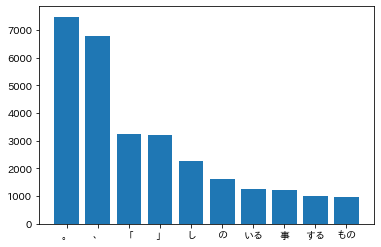

In [11]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import collections
%matplotlib inline
word_list = []
height_list = []
for i in range(10):
    word_list.append(c.most_common()[i][0]) 
    height_list.append(c.most_common()[i][1])
plt.bar(x = word_list ,height = height_list)
